In [20]:
import pandas as pd
import numpy as np                  
import seaborn as sns    
import matplotlib.pyplot as plt       
import warnings   
import scipy.stats as st  
import wquantiles as wq

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)
plt.style.use('fivethirtyeight')

In [21]:
data = pd.read_csv("gsearch_jobs.csv", index_col= 0)

In [22]:
data

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'sql', 'aws']"
1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'azure', 'excel']"
3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,Contractor,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37175,1458,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,23 hours ago,Full-time,NaN,"76,798–130,764 a year",data analyst,2022-11-04 03:40:23.706734,United States,NaN,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['power_bi', 'excel', 'r', 'python', 'tableau'..."
37176,1459,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-11-24 04:00:08.710801,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
37177,1460,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-07 04:00:12.563831,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
37178,1461,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-08 04:00:15.975728,Uni

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37180 entries, 0 to 37179
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                37180 non-null  int64  
 1   title                37180 non-null  object 
 2   company_name         37180 non-null  object 
 3   location             37153 non-null  object 
 4   via                  37171 non-null  object 
 5   description          37180 non-null  object 
 6   extensions           37180 non-null  object 
 7   job_id               37180 non-null  object 
 8   thumbnail            21310 non-null  object 
 9   posted_at            37180 non-null  object 
 10  schedule_type        37003 non-null  object 
 11  work_from_home       16522 non-null  object 
 12  salary               6430 non-null   object 
 13  search_term          37180 non-null  object 
 14  date_time            37180 non-null  object 
 15  search_location      37180 non-null  obje

In [24]:
data.columns

Index(['index', 'title', 'company_name', 'location', 'via', 'description',
       'extensions', 'job_id', 'thumbnail', 'posted_at', 'schedule_type',
       'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [25]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,37180.0,NaN,NaN,NaN,1141.804008,729.026652,0.0,546.0,1093.0,1651.0,3707.0
title,37180,14094,Data Analyst,4337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_name,37180,8859,Upwork,5780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,37153,682,Anywhere,9428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
via,37171,577,via LinkedIn,12367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,37180,26328,"The Sr. Data Analyst, Marketing Operations wil...",258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extensions,37180,5844,"['17 hours ago', 'Full-time']",600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_id,37180,37160,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBIUiBBbm...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thumbnail,21310,6465,https://encrypted-tbn0.gstatic.com/images?q=tb...,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posted_at,37180,81,17 hours ago,2853,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.nunique()

index                   3708
title                  14094
company_name            8859
location                 682
via                      577
description            26328
extensions              5844
job_id                 37160
thumbnail               6465
posted_at                 81
schedule_type             23
work_from_home             1
salary                  1359
search_term                1
date_time               3879
search_location            1
commute_time               0
salary_pay              1359
salary_rate                3
salary_avg               694
salary_min               434
salary_max               469
salary_hourly            263
salary_yearly            422
salary_standardized      688
description_tokens      7398
dtype: int64

In [27]:
data.isna().sum()

index                      0
title                      0
company_name               0
location                  27
via                        9
description                0
extensions                 0
job_id                     0
thumbnail              15870
posted_at                  0
schedule_type            177
work_from_home         20658
salary                 30750
search_term                0
date_time                  0
search_location            0
commute_time           37180
salary_pay             30750
salary_rate            30750
salary_avg             30750
salary_min             31116
salary_max             31116
salary_hourly          32927
salary_yearly          35016
salary_standardized    30750
description_tokens         0
dtype: int64

In [28]:
data.duplicated().sum()

0

In [29]:
data.head()

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'sql', 'aws']"
1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'azure', 'excel']"
3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,Contractor,True,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,Full-time,NaN,NaN,data analyst,2023-08-02 03:00:13.054897,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'powerpoint']"


In [30]:
data.tail()

,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
37175,1458,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,23 hours ago,Full-time,NaN,"76,798–130,764 a year",data analyst,2022-11-04 03:40:23.706734,United States,NaN,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['power_bi', 'excel', 'r', 'python', 'tableau'..."
37176,1459,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-11-24 04:00:08.710801,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
37177,1460,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-07 04:00:12.563831,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
37178,1461,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-08 04:00:15.975728,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
37179,1462,Institutional Credit Management - Lending Data...,Citi,United States,via My ArkLaMiss Jobs,The Institutional Credit Management (ICM) grou...,"['24 hours ago', '105,850–158,780 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJJbnN0aXR1dGlvbmFsIENyZWRpdC...,https://encrypted-tbn0.gstatic.com/images?q=tb...,24 hours ago,Full-time,NaN,"105,850–158,780 a year",data analyst,2023-01-25 04:00:26.521124,United States,NaN,105850–158780,a year,132315.0,105850.0,158780.0,NaN,132315.0,132315.0,"['tableau', 'cognos']"


In [31]:
data.drop(columns=[
    'index','description','job_id','thumbnail','extensions','work_from_home',
    'commute_time','salary_pay', 'salary_rate', 'salary_avg',
    'salary_min', 'salary_max', 'salary_hourly', 'salary_yearly',
    'salary_standardized'
    ],axis=1,inplace=True)

data.rename(columns={
    'title':'job_title',
    'via':'job_platform'
},inplace=True)

In [32]:
data.iloc[:4]

,job_title,company_name,location,job_platform,posted_at,schedule_type,salary,search_term,date_time,search_location,description_tokens
0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,22 hours ago,Full-time,NaN,data analyst,2023-08-02 03:00:13.054897,United States,"['tableau', 'sql', 'aws']"
1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,53 minutes ago,Full-time,NaN,data analyst,2023-08-02 03:00:13.054897,United States,[]
2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,3 hours ago,Full-time,NaN,data analyst,2023-08-02 03:00:13.054897,United States,"['sql', 'azure', 'excel']"
3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,23 hours ago,Contractor,NaN,data analyst,2023-08-02 03:00:13.054897,United States,['excel']


In [33]:
data['date_time'].dtype

dtype('O')

In [34]:
data['date_time']=pd.to_datetime(data['date_time'])

In [35]:
data['date_time'].dtype

dtype('<M8[ns]')

In [36]:
def feature_creation(df):
    df['year']=df['date_time'].dt.year.astype('Int64') 
    df['month']=df['date_time'].dt.month.astype('Int64')
    df['month_name']=df['date_time'].dt.month_name()
    df['day_of_year']=df['date_time'].dt.day_of_year.astype('Int64')
    df['day_of_week']=df['date_time'].dt.day_of_week.astype('Int64')
    df['day']=df['date_time'].dt.day.astype('Int64')
    df['day_name']=df['date_time'].dt.day_name()
    df['time']=df['date_time'].dt.time

In [37]:
feature_creation(data)

In [38]:
data.iloc[:4]

,job_title,company_name,location,job_platform,posted_at,schedule_type,salary,search_term,date_time,search_location,description_tokens,year,month,month_name,day_of_year,day_of_week,day,day_name,time
0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,22 hours ago,Full-time,NaN,data analyst,2023-08-02 03:00:13.054897,United States,"['tableau', 'sql', 'aws']",2023,8,August,214,2,2,Wednesday,03:00:13.054897
1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,53 minutes ago,Full-time,NaN,data analyst,2023-08-02 03:00:13.054897,United States,[],2023,8,August,214,2,2,Wednesday,03:00:13.054897
2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,3 hours ago,Full-time,NaN,data analyst,2023-08-02 03:00:13.054897,United States,"['sql', 'azure', 'excel']",2023,8,August,214,2,2,Wednesday,03:00:13.054897
3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,23 hours ago,Contractor,NaN,data analyst,2023-08-02 03:00:13.054897,United States,['excel'],2023,8,August,214,2,2,Wednesday,03:00:13.054897


In [39]:
# Data Analyst Job Titles in the Dataset
data_analyst_job_titles=[
    'Analyst','Specialist','Analytics','analyt','Analysis','analyst','ANALYST','analysis',
    'Field','Excel','Modeler','Architect','Librarian','Big Data','HR','Integration','BI',
    'Business Intelligence'
    ]
for index in data_analyst_job_titles:
        data['job_title']=np.where(data['job_title'].str.contains(index),'Data Analyst',data['job_title'])

# Data Scientist Job Titles in the Dataset
data_scientist_job_titles=['Scientist','SCIENTIST','scientist']
for index in data_scientist_job_titles:
    data['job_title']=np.where(data['job_title'].str.contains(index),'Data Scientist',data['job_title'])

# Data Engineer Job Titles in the Dataset
data_engineer_job_titles=['Engineer']
for index in data_engineer_job_titles:
    data['job_title']=np.where(data['job_title'].str.contains(index),'Data Engineer',data['job_title'])

In [40]:
data=data.query("job_title == 'Data Analyst' | job_title == 'Data Scientist' | job_title == 'Data Engineer'").reset_index(drop=True).copy()

In [41]:
list(data['job_title'].unique())

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [42]:
data['location'].value_counts().iloc[:5]

location
 Anywhere                 8429
Anywhere                  6381
  United States           6372
United States             3616
  Oklahoma City, OK        691
Name: count, dtype: int64

In [43]:
data['location']=data['location'].str.strip()

In [44]:
data['location'].value_counts().iloc[:5]

location
Anywhere              14810
United States          9988
Kansas City, MO        1122
Oklahoma City, OK      1071
Jefferson City, MO      790
Name: count, dtype: int64

In [45]:
data['job_platform'].iloc[:2]

0    via LinkedIn
1    via LinkedIn
Name: job_platform, dtype: object

In [46]:
data['job_platform']=data['job_platform'].str.strip().str.replace('via','')

In [47]:
data['job_platform'].iloc[:2]

0     LinkedIn
1     LinkedIn
Name: job_platform, dtype: object

In [48]:
data['hourly_salary']=np.where(data['salary'].str.contains('an hour'),data['salary'],np.NAN)
data['yearly_salary']=np.where(data['salary'].str.contains('a year'),data['salary'],np.NAN)

In [49]:
data['hourly_salary']=data['hourly_salary'].str.replace('an hour','').str.strip()
data[['min_hourly_salary','max_hourly_salary']]=data['hourly_salary'].str.split('–',expand=True).astype('Float64')
data['avg_hourly_salary']=np.divide(np.add(data['min_hourly_salary'],data['max_hourly_salary']),2).astype('Int64')
data.drop(columns=['min_hourly_salary','max_hourly_salary'],axis=1,inplace=True)

In [50]:
data.loc[data['avg_hourly_salary'].notnull()][['job_title','company_name','avg_hourly_salary']].iloc[:4]

,job_title,company_name,avg_hourly_salary
21,Data Analyst,Upwork,30
25,Data Scientist,Insight Global,52
61,Data Analyst,Upwork,87
156,Data Analyst,Modis,64


In [51]:
data['yearly_salary']=data['yearly_salary'].str.replace('a year','').str.replace('K','000').str.replace(',','').str.strip()
data[['min_yearly_salary','max_yearly_salary']]=data['yearly_salary'].str.split('–',expand=True).astype('Float64')
data['avg_yearly_salary']= np.divide(np.add(data['min_yearly_salary'],data['max_yearly_salary']),2).astype('Int64')
data.drop(columns=['min_yearly_salary','max_yearly_salary'],axis=1,inplace=True)

In [52]:
data.loc[data['avg_yearly_salary'].notnull()][['job_title','company_name','avg_yearly_salary']]\
                                    .sort_values(by='avg_yearly_salary',ascending=False).iloc[:4]

,job_title,company_name,avg_yearly_salary
4717,Data Scientist,Storm5,300000
8720,Data Scientist,Teradata,288000
11077,Data Scientist,Storm5,250000
5050,Data Scientist,Teradata,243500


In [53]:
data['description_tokens']=data['description_tokens'].str.replace('[','').str.replace(']','').str.replace("'",'')

In [54]:
def remove_duplicates(df):
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True,inplace=True)
    return print(f'Duplicate Records : {df.duplicated().sum()}')

In [55]:
remove_duplicates(data)

Duplicate Records : 0


In [56]:
cat_nas=['location','schedule_type','job_platform','salary','hourly_salary','yearly_salary']
for index in cat_nas:
    data[index].fillna(value=data[index].mode()[0],inplace=True)

In [57]:
num_nas=['avg_hourly_salary','avg_yearly_salary']
for index in num_nas:
    data[index].fillna(value=round(data[index].mean()),inplace=True)

In [58]:
data=data[[
    'job_title','company_name','location','schedule_type','description_tokens','salary','hourly_salary','yearly_salary',
    'avg_hourly_salary','avg_yearly_salary','job_platform','posted_at','search_term','search_location','date_time','year',
    'month','month_name','day_of_year','day_of_week','day','day_name','time'
    ]].copy()

In [59]:
data.iloc[:5]

,job_title,company_name,location,schedule_type,description_tokens,salary,hourly_salary,yearly_salary,avg_hourly_salary,avg_yearly_salary,job_platform,posted_at,search_term,search_location,date_time,year,month,month_name,day_of_year,day_of_week,day,day_name,time
0,Data Analyst,Cisco Meraki,Anywhere,Full-time,"tableau, sql, aws",77K–116K a year,18.33–28.20,77000–116000,42,99764,LinkedIn,22 hours ago,data analyst,United States,2023-08-02 03:00:13.054897,2023,8,August,214,2,2,Wednesday,03:00:13.054897
1,Data Analyst,Midwest Staffing,Anywhere,Full-time,,77K–116K a year,18.33–28.20,77000–116000,42,99764,LinkedIn,53 minutes ago,data analyst,United States,2023-08-02 03:00:13.054897,2023,8,August,214,2,2,Wednesday,03:00:13.054897
2,Data Analyst,"Amyx, Inc.",United States,Full-time,"sql, azure, excel",77K–116K a year,18.33–28.20,77000–116000,42,99764,Indeed,3 hours ago,data analyst,United States,2023-08-02 03:00:13.054897,2023,8,August,214,2,2,Wednesday,03:00:13.054897
3,Data Analyst,Upwork,Anywhere,Contractor,excel,77K–116K a year,18.33–28.20,77000–116000,42,99764,Upwork,23 hours ago,data analyst,United States,2023-08-02 03:00:13.054897,2023,8,August,214,2,2,Wednesday,03:00:13.054897
4,Data Analyst,Bank Street College of Education,United States,Full-time,"excel, powerpoint",77K–116K a year,18.33–28.20,77000–116000,42,99764,Higher Education Recruitment Consortium (HERC...,20 hours ago,data analyst,United States,2023-08-02 03:00:13.054897,2023,8,August,214,2,2,Wednesday,03:00:13.054897


In [60]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']
for index in job_titles:
    print(
    f"Average Hourly Salary for {index} : ${data.query('job_title == @index')['avg_hourly_salary'].mean():,.2f}\n"
    f"Average Yearly Salary for {index} : ${data.query('job_title == @index')['avg_yearly_salary'].mean():,.2f}\n"
    )

Average Hourly Salary for Data Analyst : $41.96
Average Yearly Salary for Data Analyst : $99,554.23

Average Hourly Salary for Data Scientist : $43.10
Average Yearly Salary for Data Scientist : $104,679.93

Average Hourly Salary for Data Engineer : $42.28
Average Yearly Salary for Data Engineer : $102,851.83



In [61]:
for index in job_titles:
    print(
    f"Average Hourly Salary for {index} : ${st.trim_mean(data.query('job_title == @index')['avg_hourly_salary'].sort_values(ascending=False),0.1):,.2f}\n"
    
    f"Average Yearly Salary for {index} : ${st.trim_mean(data.query('job_title == @index')['avg_yearly_salary'].sort_values(ascending=False),0.1):,.2f}\n"
    )

Average Hourly Salary for Data Analyst : $42.00
Average Yearly Salary for Data Analyst : $99,764.00

Average Hourly Salary for Data Scientist : $42.00
Average Yearly Salary for Data Scientist : $99,764.00

Average Hourly Salary for Data Engineer : $42.00
Average Yearly Salary for Data Engineer : $99,764.00



In [62]:
for index in job_titles:
    print(
    f"Average Hourly Salary for {index} : ${np.average(data.query('job_title == @index')['avg_hourly_salary'],weights=data.query('job_title == @index')['month']):,.2f}\n"
    
    f"Average Yearly Salary for {index} : ${np.average(data.query('job_title == @index')['avg_yearly_salary'],weights=data.query('job_title == @index')['month']):,.2f}\n"
    )

Average Hourly Salary for Data Analyst : $41.90
Average Yearly Salary for Data Analyst : $99,630.56

Average Hourly Salary for Data Scientist : $43.05
Average Yearly Salary for Data Scientist : $104,727.98

Average Hourly Salary for Data Engineer : $42.40
Average Yearly Salary for Data Engineer : $102,544.97



In [63]:
for index in job_titles:
    print(
    f"Average Hourly Salary for {index} : ${data.query('job_title == @index')['avg_hourly_salary'].median():,.2f}\n"
    f"Average Yearly Salary for {index} : ${data.query('job_title == @index')['avg_yearly_salary'].median():,.2f}\n"
    )

Average Hourly Salary for Data Analyst : $42.00
Average Yearly Salary for Data Analyst : $99,764.00

Average Hourly Salary for Data Scientist : $42.00
Average Yearly Salary for Data Scientist : $99,764.00

Average Hourly Salary for Data Engineer : $42.00
Average Yearly Salary for Data Engineer : $99,764.00



In [64]:
for index in job_titles:
    print(
    f"Average Hourly Salary for {index} : ${wq.median(data.query('job_title == @index')['avg_hourly_salary'].astype(int),weights=data.query('job_title == @index')['month'].astype(int)):,.2f}\n"
    
    f"Average Yearly Salary for {index} : ${wq.median(data.query('job_title == @index')['avg_yearly_salary'].astype(int),weights=data.query('job_title == @index')['month'].astype(int)):,.2f}\n"
    )

Average Hourly Salary for Data Analyst : $42.00
Average Yearly Salary for Data Analyst : $99,764.00

Average Hourly Salary for Data Scientist : $42.00
Average Yearly Salary for Data Scientist : $99,764.00

Average Hourly Salary for Data Engineer : $42.00
Average Yearly Salary for Data Engineer : $99,764.00



Taking the Mean into Consideration ;

Average Hourly Salary for Data Analyst : $41.99
Average Yearly Salary for Data Analyst : $99,510.17

Average Hourly Salary for Data Scientist : $43.16
Average Yearly Salary for Data Scientist : $104,554.23

Average Hourly Salary for Data Engineer : $42.25
Average Yearly Salary for Data Engineer : $102,842.64 </i>

In [65]:
for index in job_titles:
    print(
    f"Variance of Hourly Salary for {index} : ${data.query('job_title == @index')['avg_hourly_salary'].var():,.2f}\n"
    f"Variance of Yearly Salary for {index} : ${data.query('job_title == @index')['avg_yearly_salary'].var():,.2f}\n"
    )

Variance of Hourly Salary for Data Analyst : $48.67
Variance of Yearly Salary for Data Analyst : $52,280,737.40

Variance of Hourly Salary for Data Scientist : $63.82
Variance of Yearly Salary for Data Scientist : $440,992,283.57

Variance of Hourly Salary for Data Engineer : $9.77
Variance of Yearly Salary for Data Engineer : $217,720,102.99



In [66]:
for index in job_titles:
    print(
    f"Standard Deviation of Hourly Salary for {index} : ${data.query('job_title == @index')['avg_hourly_salary'].std():,.2f}\n"
    f"Standard Deviation of Yearly Salary for {index} : ${data.query('job_title == @index')['avg_yearly_salary'].std():,.2f}\n"
    )

Standard Deviation of Hourly Salary for Data Analyst : $6.98
Standard Deviation of Yearly Salary for Data Analyst : $7,230.54

Standard Deviation of Hourly Salary for Data Scientist : $7.99
Standard Deviation of Yearly Salary for Data Scientist : $20,999.82

Standard Deviation of Hourly Salary for Data Engineer : $3.13
Standard Deviation of Yearly Salary for Data Engineer : $14,755.34



In [67]:
for index in job_titles:
    print((
    f"Mean Absolute Deviation of Hourly Salary for {index} : ${np.mean(np.absolute(data.query('job_title == @index')['avg_hourly_salary']-data.query('job_title == @index')['avg_hourly_salary'].mean())):,.2f}\n"
    
    f"Mean Absolote Deviation of Yearly Salary for {index} : ${np.mean(np.absolute(data.query('job_title == @index')['avg_yearly_salary']-data.query('job_title == @index')['avg_yearly_salary'].mean())):,.2f}\n"
    ))

Mean Absolute Deviation of Hourly Salary for Data Analyst : $1.75
Mean Absolote Deviation of Yearly Salary for Data Analyst : $1,402.98

Mean Absolute Deviation of Hourly Salary for Data Scientist : $3.02
Mean Absolote Deviation of Yearly Salary for Data Scientist : $9,426.54

Mean Absolute Deviation of Hourly Salary for Data Engineer : $0.68
Mean Absolote Deviation of Yearly Salary for Data Engineer : $5,983.84



In [68]:
for index in job_titles:
    print(
    f"Median Absolute Deviation of Hourly Salary for {index} : ${np.mean(np.absolute(data.query('job_title == @index')['avg_hourly_salary']-data.query('job_title == @index')['avg_hourly_salary'].median())):,.2f}\n"
    
    f"Median Absolote Deviation of Yearly Salary for {index} : ${np.mean(np.absolute(data.query('job_title == @index')['avg_yearly_salary']-data.query('job_title == @index')['avg_yearly_salary'].median())):,.2f}\n"
    )

Median Absolute Deviation of Hourly Salary for Data Analyst : $1.72
Median Absolote Deviation of Yearly Salary for Data Analyst : $1,208.67

Median Absolute Deviation of Hourly Salary for Data Scientist : $2.06
Median Absolote Deviation of Yearly Salary for Data Scientist : $5,226.78

Median Absolute Deviation of Hourly Salary for Data Engineer : $0.41
Median Absolote Deviation of Yearly Salary for Data Engineer : $3,324.03



In [69]:
salary=['avg_hourly_salary','avg_yearly_salary']
for index in salary:
    iqr1,iqr2=np.percentile(data[index],[75,25])
    print(f"IQR {str(index).capitalize()} : ${np.subtract(iqr1,iqr2):,.2f}")

IQR Avg_hourly_salary : $0.00
IQR Avg_yearly_salary : $0.00


Taking Standard Deviation into Consideration ;

Standard Deviation of Hourly Salary for Data Analyst : $7.00
Standard Deviation of Yearly Salary for Data Analyst : $7,242.80

Standard Deviation of Hourly Salary for Data Scientist : $8.19
Standard Deviation of Yearly Salary for Data Scientist : $20,210.50

Standard Deviation of Hourly Salary for Data Engineer : $3.00
Standard Deviation of Yearly Salary for Data Engineer : $14,896.52 </i>

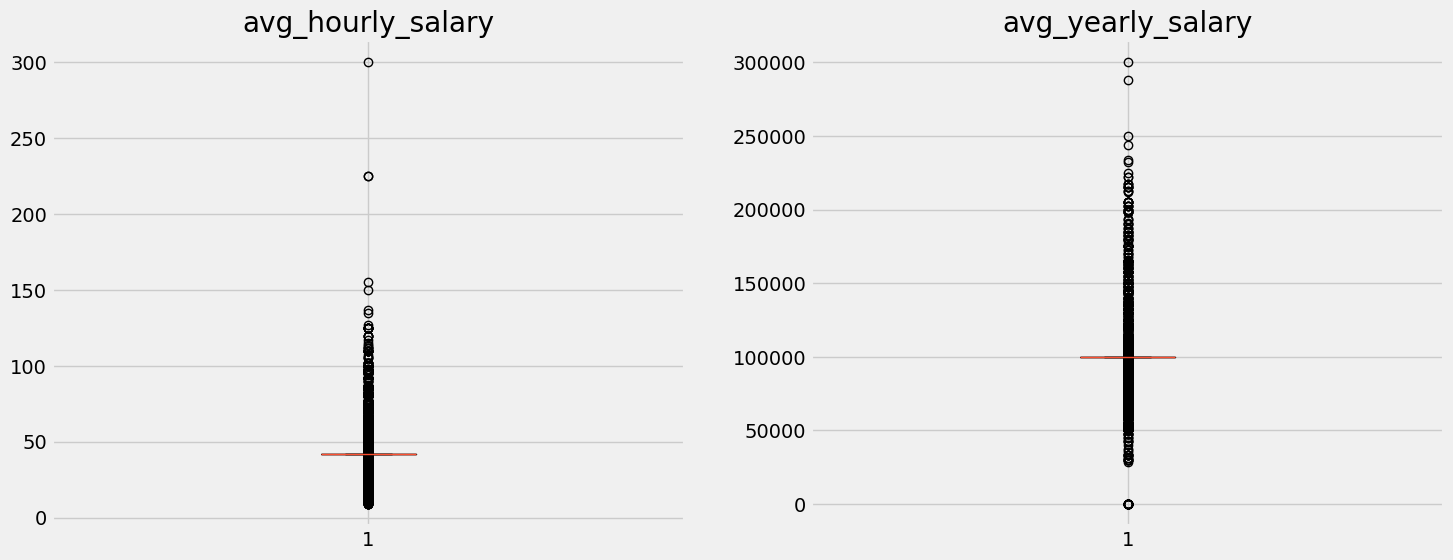

In [70]:
cols=['avg_hourly_salary','avg_yearly_salary']
fig,ax=plt.subplots(ncols=2,figsize=(16,6))
for index,content in enumerate(cols):
    ax[index].boxplot(data=data,x=content)
    ax[index].set_title(content)
plt.show()

In [71]:
data[['avg_hourly_salary','avg_yearly_salary']].quantile([0.05,0.25,0.5,0.75,1.0])

,avg_hourly_salary,avg_yearly_salary
0.05,37.0,99764.0
0.25,42.0,99764.0
0.50,42.0,99764.0
0.75,42.0,99764.0
1.00,300.0,300000.0


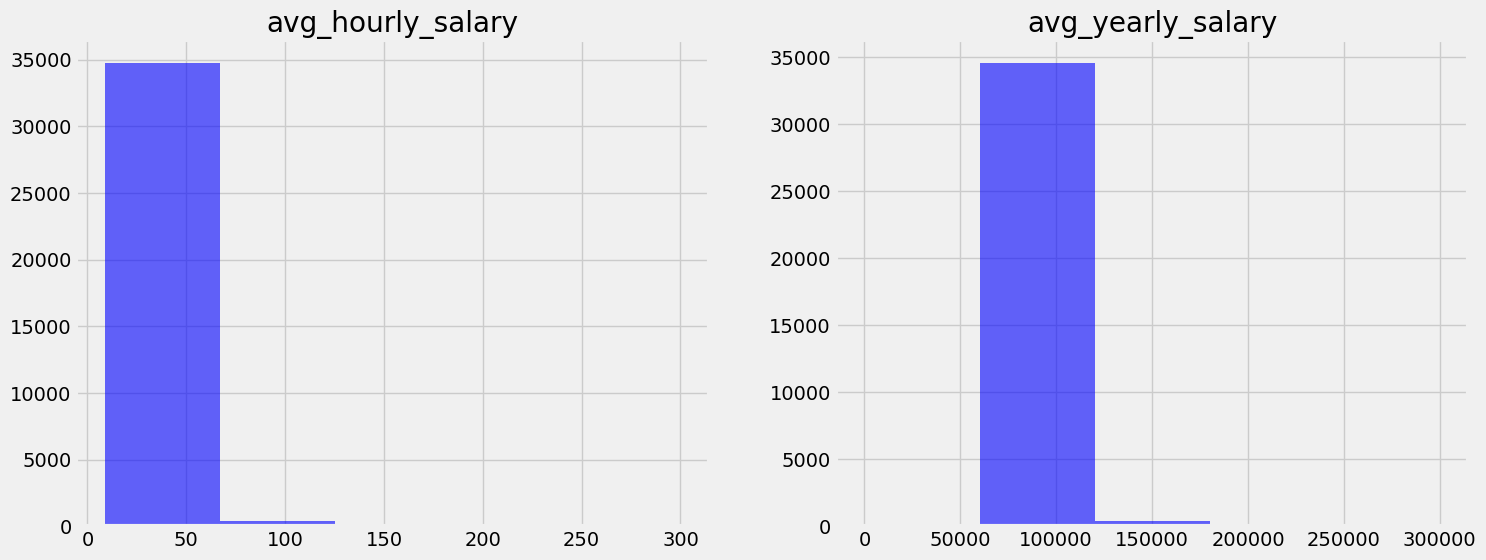

In [72]:
fig,ax=plt.subplots(ncols=2,figsize=(16,6))
for index,content in enumerate(cols):
    ax[index].hist(data=data,x=content,bins=5,color='blue',alpha=0.6)
    ax[index].set_title(content)
    
plt.show()

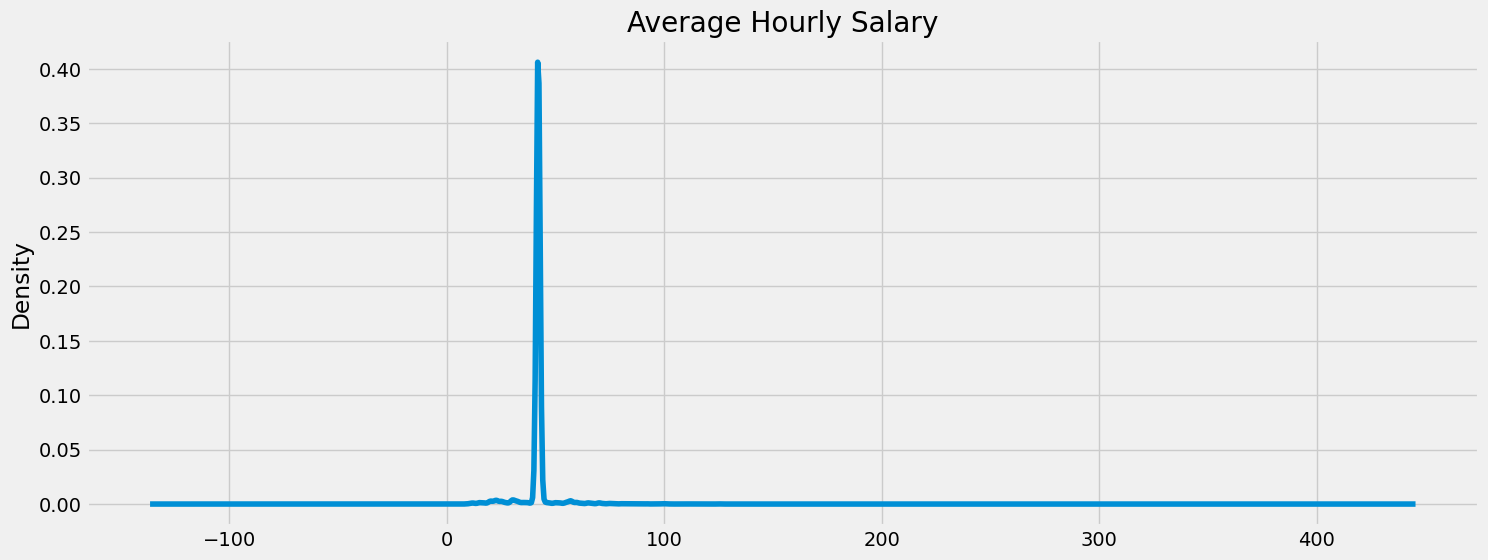

In [73]:
data['avg_hourly_salary'].plot(kind='kde',figsize=(16,6),title='Average Hourly Salary')
plt.show()

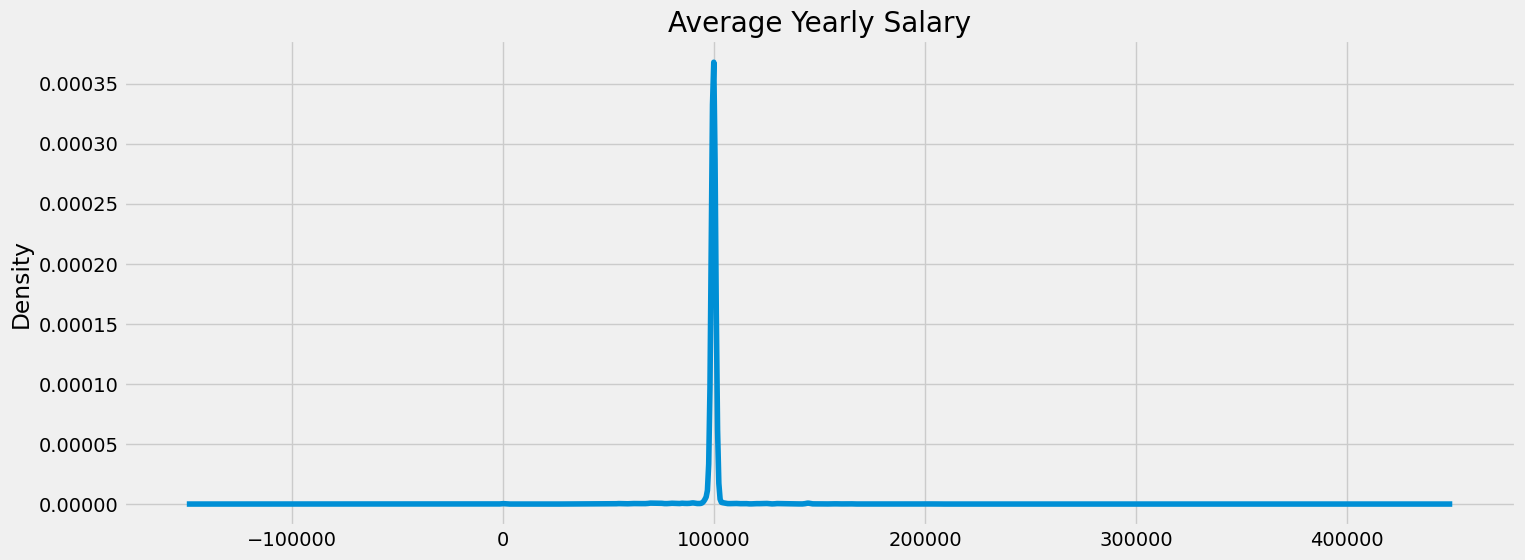

In [74]:
data['avg_yearly_salary'].plot(kind='kde',figsize=(16,6),title='Average Yearly Salary')
plt.show()

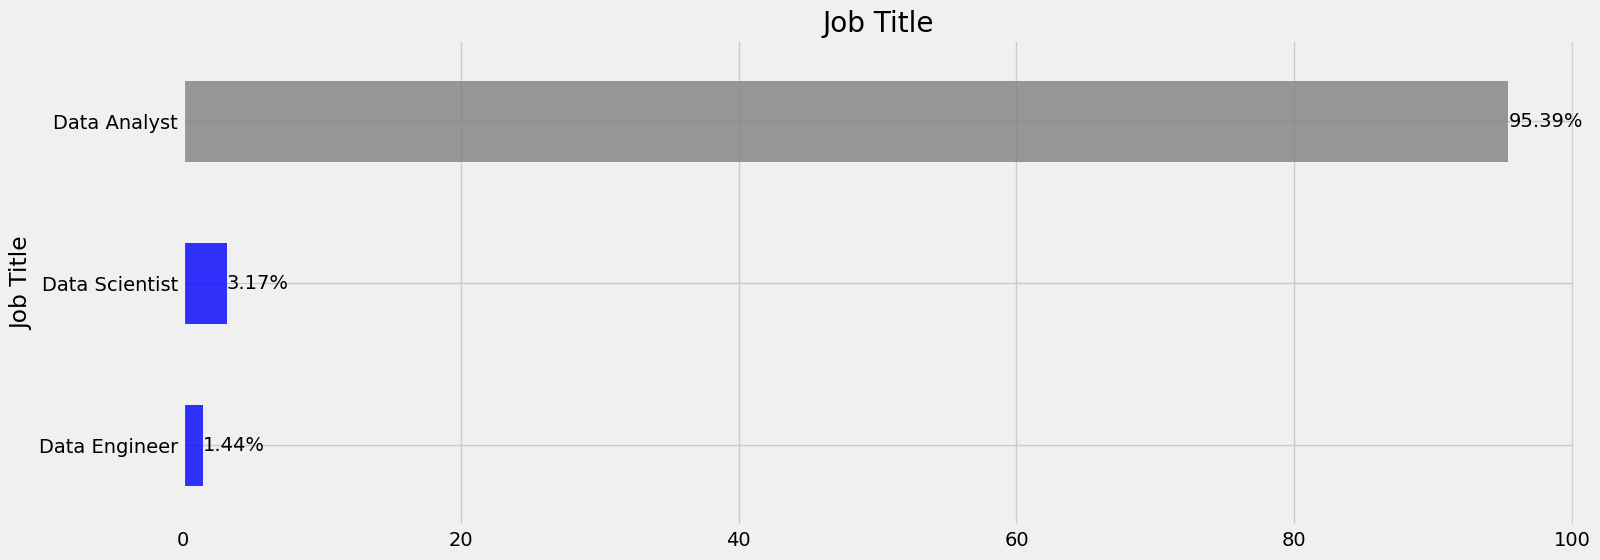

In [75]:
colors = ['blue']*2 + ['gray']
ax=((data['job_title']
    .value_counts(normalize=True)*100)
    .sort_values()
    .plot(kind='barh',title='Job Title',figsize=(16,6),ylabel='Job Title',
    color=colors,alpha=0.8
         ))

for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%') 
    
plt.show()

In [85]:
from import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt",download_dir=r'C:\\Users\\julee\Desktop\\nltk_data\\nltk-3.8.1\\nltk-3.8.1\\nltk\\tokenize\\punkt.py')
data['description_tokens']=data['description_tokens'].str.replace(',','')
data['description_tokens']=data['description_tokens'].apply(word_tokenize)

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\julee/nltk_data'
    - 'c:\\Users\\julee\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\julee\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\julee\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\julee\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
from collections import Counter
counter=Counter()
for index in data['description_tokens']:
    counter.update(index)

In [ ]:
counter.most_common(10)

In [ ]:
result=dict(counter.most_common())
result=pd.DataFrame({
    'tool':result.keys(),
    'counts':result.values()
})

In [ ]:
result['percentage']=result['counts'].apply(lambda x : (x / result['counts'].sum())*100)
result[:10]

In [ ]:
plt.figure(figsize=(16,6))
ax=sns.barplot(y=result['tool'].iloc[:10],x=result['percentage'].iloc[:10])
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.title('Top Programming Languages and Tools')
plt.xlabel('Percentage')
plt.ylabel('Tool/Programming Language')
plt.show()

In [ ]:
colors = ['blue']*9 + ['gray']

ax = ((data['company_name']
    .value_counts(normalize=True)*100).iloc[:10]
    .sort_values()
    .plot(kind='barh', title='Company', figsize=(16, 6), ylabel='Company Name',
     alpha=0.8, color=colors))

for a in ax.containers:
    plt.bar_label(a, fmt='%.2f%%')

plt.show()

In [ ]:
colors = ['blue']*9 + ['gray']
ax=((data['location']
    .value_counts(normalize=True)*100).iloc[:10]
    .sort_values()
    .plot(kind='barh',title='Location',figsize=(16,6),ylabel='Location',
     color=colors,alpha=0.8))

for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%') 
    
plt.show()

In [ ]:
colors = ['blue']*9 + ['gray']
ax=((data['schedule_type']
    .value_counts(normalize=True)*100).iloc[:10]
    .sort_values()
    .plot(kind='barh',title='Schedule Type',figsize=(16,6),ylabel='Schedule Type',
     color=colors,alpha=0.8))

for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%') 
    
plt.show()

In [ ]:
colors = ['blue']*9 + ['gray']
ax=((data['job_platform']
    .value_counts(normalize=True)*100).iloc[:10]
    .sort_values()
    .plot(kind='barh',title='Job Platform',figsize=(16,6),ylabel='Job Platform',
    color=colors,alpha=0.8 
         ))

for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%') 
    
plt.show()

In [ ]:
colors = ['blue']*6 + ['gray']
ax=((data['day_name']
    .value_counts(normalize=True)*100)
    .sort_values()
    .plot(kind='barh',title='Day of Week',figsize=(16,6),ylabel='Day of Week',
    color=colors,alpha=0.8
         ))

for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%') 
    
plt.show()

In [ ]:
colors = ['blue']*11 + ['gray']
ax=((data['month_name']
    .value_counts(normalize=True)*100)
    .sort_values()
    .plot(kind='barh',title='Month',figsize=(16,6),ylabel='Month',
    color=colors,alpha=0.8
         ))

for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%') 
    
plt.show()

In [ ]:
colors = ['blue']*1 + ['gray']
ax=((data['year']
    .value_counts(normalize=True)*100)
    .sort_values()
    .plot(kind='barh',title='Year',figsize=(16,6),ylabel='Year',
    color=colors,alpha=0.8
         ))

for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%') 
    
plt.show()